## Ghost-front modelling ##

In [1]:
# Import libaries
# As seen in HIEnsembleHindcast/ensemble_analysis.ipynb by L.Barnard ()
import HUXt as H
import HUXt_updated as H2
#import HIEnsembleHindcast as heh
#import HI_analysis as hip
import tables
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import moviepy.editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage
import numpy as np
import pandas as pd
import os 
from astropy.time import Time, TimeDelta
from astropy.visualization import time_support
import scipy.stats as st
from scipy.interpolate import interp1d
import glob
import math
import sunpy.coordinates.sun as sn
import h5py
import ensemble as ens
import matplotlib.ticker as ticker
import ghostfront as gf
import importlib

In [2]:
# Variables
event_tag = "12Dec08CME_r=30"

# CME deterministic conditions
t_launch = 0.0 * u.day
longitude = 10.0 * u.deg
latitude = 0.0 * u.deg
width = 46 *u .deg
v = 498 * (u.km/u.s)
thickness = 5 * u.solRad

# HUXt conditions
v_boundary = np.flip([.361374481276616564e+02, 2.240716540668226173e+02, 2.376358249750887524e+02, 2.672482825902510513e+02, 3.096930808344839647e+02, 3.746892075320072308e+02, 4.268668006326229829e+02, 4.456230409562588761e+02, 4.325098393596861115e+02, 3.923976427092088670e+02, 4.160318741275664820e+02, 5.042482225194921739e+02, 5.947393810828092455e+02, 6.654072046028741170e+02, 6.917310550116643526e+02, 6.800427872609535598e+02, 6.219320569550533264e+02, 5.444059259203741021e+02, 5.043734613245545120e+02, 4.865263506790949464e+02, 4.849001221974726263e+02, 5.045156599835149223e+02, 5.157868414718000167e+02, 5.115173862842027006e+02, 4.783484024373857437e+02, 4.105433314643044014e+02, 3.252113536761797832e+02, 2.718381068427589753e+02, 2.611473445493025451e+02, 2.703445822983272251e+02, 2.879318070637758638e+02, 2.935649302292242169e+02, 2.913420114766625488e+02, 2.875243364183726271e+02, 2.758837083349550880e+02, 2.646586033040824191e+02, 2.620296606197267693e+02, 2.587181867060620561e+02, 2.583143812807093127e+02, 2.711622648112132197e+02, 2.895073025814325547e+02, 3.236093677154411807e+02, 3.602300486613148678e+02, 3.901021949691497639e+02, 4.000613537591571003e+02, 3.943689844061491954e+02, 3.953941447719399775e+02, 4.148021072583192677e+02, 4.417805902433387359e+02, 4.475472602689640098e+02, 4.214612344162281943e+02, 3.691015029453656098e+02, 3.122498162083122111e+02, 3.076938832484911472e+02, 3.321704537666684587e+02, 3.237507334340671150e+02, 3.621217972086897703e+02, 4.086377362649376437e+02, 4.435046064447465142e+02, 4.674792239491621331e+02, 4.799666692694719927e+02, 4.660162447073083172e+02, 4.706506215244046416e+02, 5.282817264033329820e+02, 5.824612174466126362e+02, 5.781493288632007079e+02, 5.519533093062667604e+02, 5.210893551054840600e+02, 4.711116992875964797e+02, 4.139039864812964993e+02, 3.685148444664304748e+02, 3.251115004054694282e+02, 2.944497484406588228e+02, 3.031728641854660964e+02, 3.017908650651369271e+02, 2.743621772706765114e+02, 2.753093603743015478e+02, 3.077932819486480867e+02, 3.142715901784403059e+02, 3.064569671412821776e+02, 2.972113560702332506e+02, 2.853275333911390703e+02, 2.781041597484824592e+02, 2.829676208301811471e+02, 2.874501592038274111e+02, 2.966814584993215362e+02, 3.135194107222907860e+02, 3.460091136549031603e+02, 3.814157744293487440e+02, 3.956749772192871433e+02, 3.684143935201673230e+02, 3.216986131456232556e+02, 2.792803446540552841e+02, 2.460060315632212564e+02, 2.535853141438094838e+02, 2.757920731764543234e+02, 2.940431313281729899e+02, 2.966822515328578334e+02, 2.954926028486351584e+02, 2.964600448988716721e+02, 2.986598892164937524e+02, 2.920602210256048465e+02, 2.862971285267943813e+02, 2.868135105926763799e+02, 2.948319974536670998e+02, 3.041351166652279971e+02, 2.854976713451857790e+02, 2.751327922228102238e+02, 2.699486953595605314e+02, 2.530033160147730484e+02, 2.300846477066176874e+02, 2.160876697185309183e+02, 2.211210117332515495e+02, 2.552383171466590284e+02, 3.045731933828458864e+02, 3.142951676630700035e+02, 2.933001971616943706e+02, 2.724793215158809971e+02, 2.577975418023809198e+02, 2.419712959689771878e+02, 2.507924724446661173e+02, 2.696897715708585679e+02, 2.776005233833919306e+02, 2.774424641305166119e+02, 2.763144001268291845e+02, 2.773574489888984544e+02, 2.629291468608762443e+02, 2.292533503180667935e+02], axis=0)* (u.km/u.s)
cr_num = 2077
cr_lon_init = 63.363 * u.deg 
simtime = 5 * u.day
dt_scale = 4                             # This shouldn't need changing frequently
inner_boundary_r = 30*u.solRad

# Ensemble info
N = 200

#### Deterministic Event Only ####

CME width: 46.0 deg


,N & F,RMSE N & F,RMSE flank,RMSE nose,flank,nose
0,14.726106,0.767492,0.425437,0.631032,5.248908,9.955037


,N & F,RMSE N & F,RMSE flank,RMSE nose,RMSE sec flank,flank,nose,sec flank
0,62.722689,1.378654,0.725898,1.178769,0.602832,17.388607,50.021897,11.992416


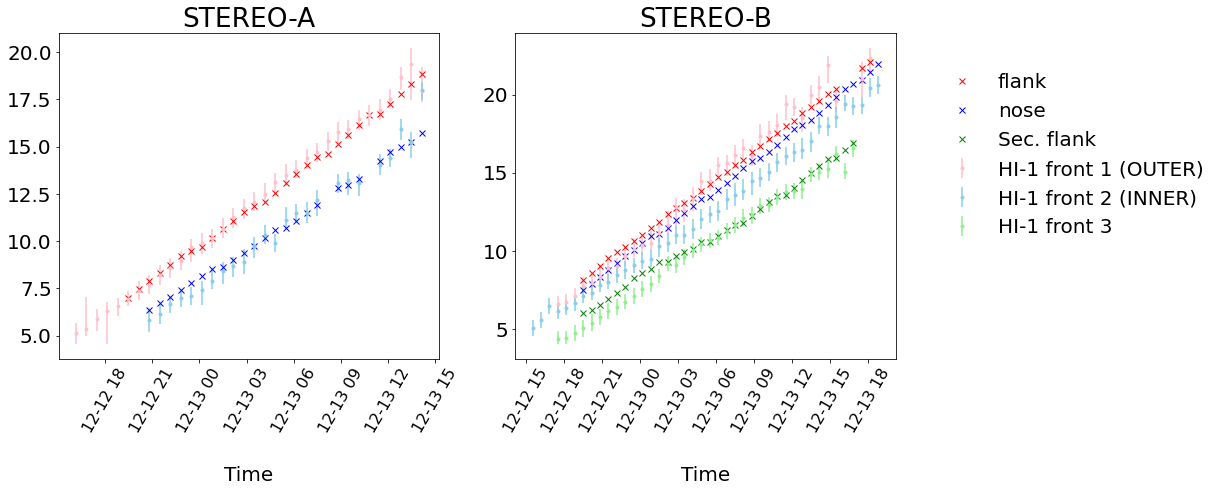

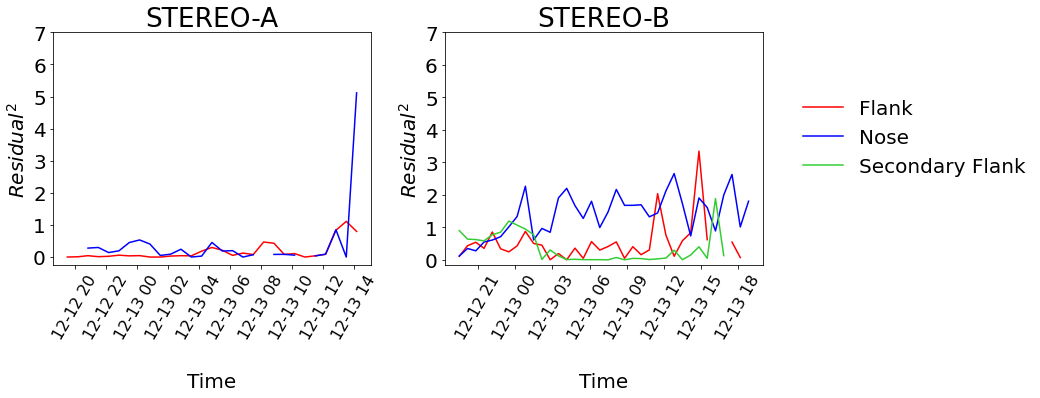

In [123]:
cme = H2.ConeCME(t_launch=t_launch, longitude=longitude, width=width, v=v, thickness=thickness)
cme_list = [cme]
model = H2.HUXt(v_boundary=v_boundary, cr_num=cr_num, cr_lon_init=cr_lon_init, simtime=simtime, dt_scale=dt_scale)
model.solve(cme_list, save=True, tag=event_tag)
#model.plot(2*u.d, field='cme', save=False, tag=event_tag)
#model.plot_timeseries(1*u.AU, lon=0.0*u.deg,field='both')
#model.animate('cme', tag=event_tag)

# gf.compute_earth_arrival(cme, model, print_values=True, plot=True)
# gf.elongation_plot(cme,'HI1',save=False, tag=event_tag)
errorA, errorB = gf.deterministic_error(cme, print_RMSE=True, plot=True, save=False)


TypeError: scalar 'Time' object is not subscriptable.

***
## Ensemble Run ##

In [5]:
gf.run_huxt_ensemble(v_boundary,cr_num=2077, cr_lon_init=63.363*u.deg, n_ensemble=5, event='12Dec08_n=5')

In [3]:
gf.run_huxt_ensemble_new(v_boundary,cr_num, cr_lon_init, longitude, latitude, width, v, thickness, t_launch=0.0*u.day, n_ensemble=5, event='12Dec08_n=5_new')

0 : 54.37108564987017 deg
1 : 48.81428527744114 deg
2 : 40.22085892806474 deg
3 : 23.10783989555773 deg
4 : 8.864524351403237 deg


In [28]:
cme.coords.keys()

dict_keys([])

In [16]:
gf.track_cme_flanks(fast=True, tag='12Dec08_n=5_new')

KeyError: "Unable to open object (object 'time' doesn't exist)"

In [3]:
gf.ensemble_cme_dataframes(n_ens = 5, fast=True, tag='12Dec08_n=5')

# Load dataframes
ens_profilesA, ens_profilesB = gf.load_csv_file(file = "elongation profiles", tag='12Dec08_n=5')
ens_errorA, ens_errorB = gf.load_csv_file(file = "errors", tag='12Dec08_n=5')
cme_init_params = gf.load_csv_file(file = "initial parameters", tag='12Dec08_n=5')
arrival_info = gf.load_csv_file(file = "arrival information", tag='12Dec08_n=5')



KeyError: "Unable to open object (object 'time' doesn't exist)"

In [8]:
help(gf.ensemble_cme_dataframes)

Help on function ensemble_cme_dataframes in module ghostfront:

ensemble_cme_dataframes(n_ens=100, fast=True, tag='')



NameError: name 'cme' is not defined